In [23]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import lsst.sims.maf.db as db
from lsst.sims.maf.utils import m52snr
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.plots as plots

import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles
from lsst.sims.utils import equatorialFromGalactic, hpid2RaDec, _healbin, healbin
from lsst.utils import getPackageDir
from mafContrib import KN_lc, KNePopMetric, generateKNPopSlicer
import healpy as hp
import os

In [132]:
# Generate the slicer which puts 10,000 events at random spots on the sphere
slicer = generateKNPopSlicer(seed=42, n_events=10000, n_files=308)

In [133]:
runName = 'baseline_v1.5_10yrs' 
opsdb = db.OpsimDatabase('/sims_maf/fbs_1.5/baseline/' + runName+'.db')
outDir = 'temp'
resultsDb = db.ResultsDb(outDir=outDir)

metric = KNePopMetric()
sql = ''
# Don't want to try and plot N individual points, 
plotDict = {'reduceFunc': np.sum, 'nside': 64}
plotFuncs = [plots.HealpixSkyMap()]
summaryMetrics=[metrics.MeanMetric(maskVal=0)]
bundle = metricBundles.MetricBundle(metric, slicer, sql, runName=runName,
                                    plotDict=plotDict, plotFuncs=plotFuncs,
                                    summaryMetrics=summaryMetrics)

Querying database SummaryAllProps with no constraint for columns ['night', 'fieldDec', 'fiveSigmaDepth', 'observationStartMJD', 'fieldRA', 'filter'].
Found 2224095 visits
Running:  ['baseline_v1_5_10yrs_KNePopMetric_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "" constraint now.


/data0/lsst_stack/stack/miniconda3-py37_4.8.2-cb4e2dc/Linux64/sims_maf/2.13.0.sims-61-g3ee711b3+fffdf3dce1/python/lsst/sims/maf/plots/plotHandler.py:518: UserWarning: Cannot plot object metric values with this plotter.
  warnings.warn('Cannot plot object metric values with this plotter.')


Plotting complete.


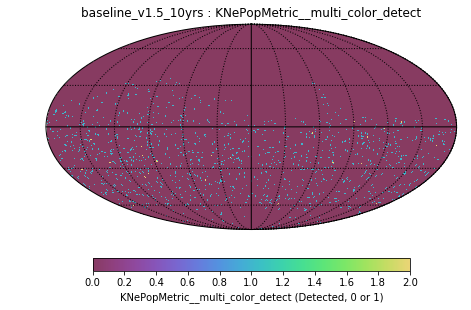

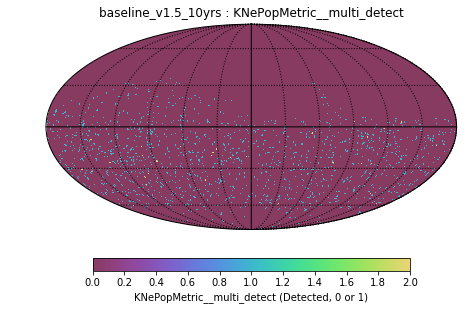

In [134]:
bd = metricBundles.makeBundlesDictFromList([bundle])
bgroup = metricBundles.MetricBundleGroup(bd, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()
bgroup.plotAll(closefigs=False)

In [135]:
# Let's see how we do.
for key in bd:
    print(key, bd[key].summaryValues)

baseline_v1_5_10yrs_KNePopMetric_USER {}
KNePopMetric__multi_color_detect {'Mean': 0.13}
KNePopMetric__multi_detect {'Mean': 0.1499}


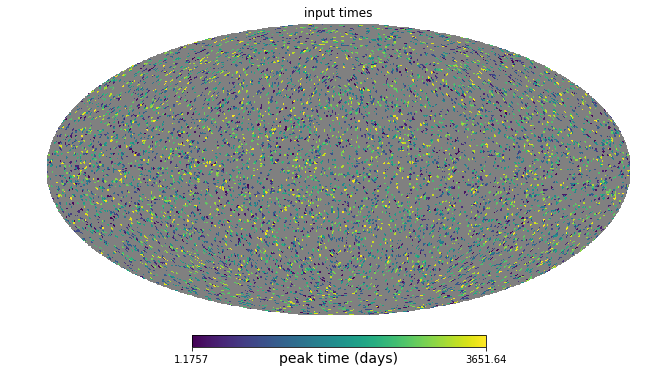

In [136]:
# Check that the positions and times look random
hp.mollview(_healbin(slicer.slicePoints['ra'], slicer.slicePoints['dec'], 
           slicer.slicePoints['peak_time'], 64, reduceFunc=np.mean), unit='peak time (days)',
           title='input times')

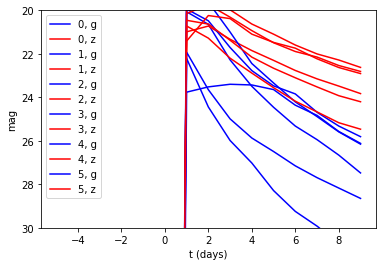

In [137]:
# let's plot up a few of the lightcurves
ivals=[0,1,2,3,4,5]

for i in ivals:
    t = np.arange(-5, 10)
    distmod = 5*np.log10(slicer.slicePoints['distance'][i]*1e6) - 5.0
    lc = metric.lightcurves.interp(t, 'g', lc_indx=slicer.slicePoints['file_indx'][i])
    plt.plot(t, lc+distmod, color='blue', label='%i, g' % i)
    lc = metric.lightcurves.interp(t, 'z', lc_indx=slicer.slicePoints['file_indx'][i])
    plt.plot(t, lc+distmod, color='red', label='%i, z' % i)
plt.ylim([30,20])
plt.xlabel('t (days)')
plt.ylabel('mag')
plt.legend()

In [139]:
# Let's see if there's a preference for which light curve was detected
indxes = np.unique(slicer.slicePoints['file_indx'])
for indx in indxes:
    in_indx = np.where(slicer.slicePoints['file_indx'] == indx)[0]
    n_total = in_indx.size
    print()
    detected = bd['KNePopMetric__multi_detect'].metricValues[in_indx].data.sum()
    print('file indx %i and %f fraction recovered' % (indx, detected/n_total))


file indx 0 and 0.000000 fraction recovered

file indx 1 and 0.000000 fraction recovered

file indx 2 and 0.166667 fraction recovered

file indx 3 and 0.000000 fraction recovered

file indx 4 and 0.000000 fraction recovered

file indx 5 and 0.200000 fraction recovered

file indx 6 and 0.250000 fraction recovered

file indx 7 and 0.000000 fraction recovered

file indx 8 and 0.166667 fraction recovered

file indx 9 and 0.000000 fraction recovered

file indx 10 and 0.000000 fraction recovered

file indx 11 and 0.000000 fraction recovered

file indx 12 and 0.000000 fraction recovered

file indx 13 and 0.200000 fraction recovered

file indx 14 and 0.100000 fraction recovered

file indx 15 and 0.000000 fraction recovered

file indx 16 and 7.087592 fraction recovered

file indx 17 and 0.125000 fraction recovered

file indx 18 and 0.000000 fraction recovered

file indx 19 and 0.333333 fraction recovered

file indx 20 and 0.000000 fraction recovered

file indx 21 and 0.166667 fraction recovere